In [1]:
from datascience import *
import numpy as np

#### Watch Demo Video below

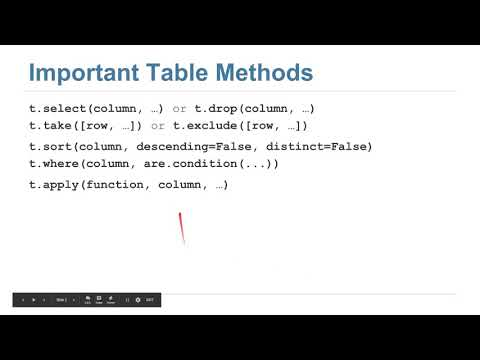

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('tGQfKdCISbA', width=800, height=300)

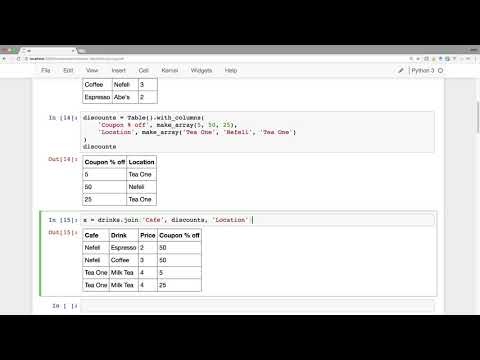

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('79W7XQHnWxo', width=800, height=300)

## Table methods

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli',  2],
    ['Coffee',    'Nefeli', 3],
    ['Espresso', "Abe's",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Tea One,4
Espresso,Nefeli,2
Coffee,Nefeli,3
Espresso,Abe's,2


In [3]:
discounts = Table().with_columns(
    'Coupon % off', make_array(5, 50, 25),
    'Location', make_array('Tea One', 'Nefeli', 'Tea One')
)
discounts

Coupon % off,Location
5,Tea One
50,Nefeli
25,Tea One


In [4]:
a = drinks.join('Cafe', discounts, 'Location')
a = a.with_column('Discounted Price', a.column(2) * (1 - a.column(3)/100) )
a = a.drop(2, 3)
a

Cafe,Drink,Discounted Price
Nefeli,Espresso,1
Nefeli,Coffee,1.5
Tea One,Milk Tea,3.8
Tea One,Milk Tea,3


In [5]:
a.sort('Discounted Price').sort('Cafe', distinct=True) # Correct, Espresso is cheaper

Cafe,Drink,Discounted Price
Nefeli,Espresso,1
Tea One,Milk Tea,3


In [6]:
a.group('Cafe', min) # Incorrect, Coffee is first alphabetically

Cafe,Drink min,Discounted Price min
Nefeli,Coffee,1
Tea One,Milk Tea,3


## Spring 2016 Midterm, Question 2(b)

#### Watch Demo Video Below


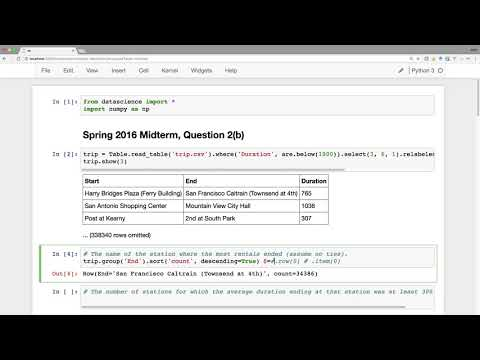

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('4ljo9LqtmYI', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [2]:
trip = Table.read_table('trip.csv').select(3, 6, 1).where('Duration', are.below(1800)).relabeled(0, 'Start').relabeled(1, 'End')
trip.show(3)

Start,End,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307


In [3]:
# The name of the station where the most rentals ended (assume no ties).
trip.group('End').sort('count', descending=True).column(0).item(0)

'San Francisco Caltrain (Townsend at 4th)'

In [4]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.
trip.group('End', np.average).where(2, are.above(10*60)).num_rows

21

## Advanced Where

#### Watch Demo Video Below

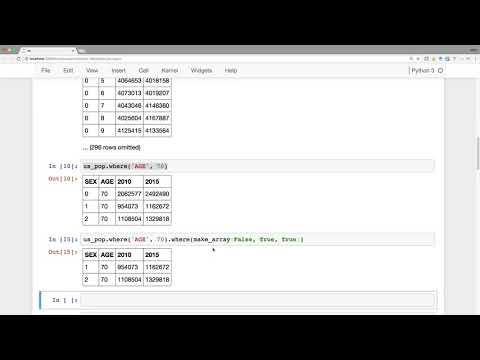

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('nUZOdd-w8-s', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [5]:
3 > 2

True

In [6]:
1 > 2

False

In [7]:
np.arange(5) > 2

array([False, False, False,  True,  True])

In [8]:
# As of Jan 2017, this census file is online here: 
# http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv

full_census_table = Table.read_table('nc-est2015-agesex-res.csv')
partial = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')
us_pop = partial.relabeled(2, '2010').relabeled(3, '2015')
us_pop

SEX,AGE,2010,2015
0,0,3951330,3978038
0,1,3957888,3968564
0,2,4090862,3966583
0,3,4111920,3974061
0,4,4077551,4020035
0,5,4064653,4018158
0,6,4073013,4019207
0,7,4043046,4148360
0,8,4025604,4167887
0,9,4125415,4133564


In [9]:
us_pop.where('AGE', 70)

SEX,AGE,2010,2015
0,70,2062577,2492490
1,70,954073,1162672
2,70,1108504,1329818


In [10]:
us_pop.where('AGE', 70).where([False, True, True])

SEX,AGE,2010,2015
1,70,954073,1162672
2,70,1108504,1329818


In [11]:
seventy = us_pop.where('AGE', 70)
seventy.column('2010') < 2000000

array([False,  True,  True])

In [12]:
seventy.where(seventy.column('2010') < 2000000)

SEX,AGE,2010,2015
1,70,954073,1162672
2,70,1108504,1329818


In [13]:
us_pop.column('2015') / us_pop.column('2010') > 1.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [14]:
us_pop.where(us_pop.column('2015') / us_pop.column('2010') > 1.5)

SEX,AGE,2010,2015
1,94,43827,68135
1,95,31736,48015
1,97,14775,23092
1,98,9505,14719
1,99,6104,9577
1,100,9352,15088


In [15]:
trip.show(3)

Start,End,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307


In [16]:
# The average duration of all trips
np.average(trip.column('Duration'))

550.001433456581

In [17]:
# The average duration of trips that started and ended at the same station
np.average(trip.where(trip.column('Start') == trip.column('End')).column('Duration'))

758.612993783838

In [18]:
# The average duration of trips that started and ended at different stations
np.average(trip.where(trip.column('Start') != trip.column('End')).column('Duration'))

546.880608118648